# pretrained cell embedding
## 1. scbert 
1. read the config file(.toml)
2. init the LoadScbert object
3. run the get_embedding() func.

In [1]:
from biollm.utils.utils import load_config
from biollm.base.load_scbert import LoadScbert
import os
import scanpy as sc

config_file = './configs/scbert_cell_emb.toml'
configs = load_config(config_file)

obj = LoadScbert(configs)
print(obj.args)

adata = sc.read_h5ad(configs.input_file)
adata.var["gene_name"] = adata.var["feature_name"]
adata.var_names = adata.var["gene_name"].values
file_name = os.path.basename(configs.input_file)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(obj.args.emb_type, adata=adata)
print('embedding shape:', emb.shape)
if not os.path.exists(configs.output_dir):
    os.makedirs(configs.output_dir, exist_ok=True)
adata.obsm['scbert_cell_emb'] = emb
adata.write_h5ad(obj.args.output_dir + f'/scbert_{file_name}_emb.h5ad')


/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/biollm/repo/scbert/performer_pytorch/performer_pytorch.py:118: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at /home/bingxing2/home/scx6002/pengyq/pytorch-v2.0.0/aten/src/ATen/native/BatchLinearAlgebra.cpp:2425.)
  q, r = torch.qr(unstructured_block.cpu(), some = True)
2024-06-19 17:18:55-load_llm[line-46]-INFO: Loading params token_emb.weight with shape torch.Size([7, 200])
2024-06-19 17:18:55-load_llm[line-46]-INFO: Loading params pos_emb.emb.weight with shape torch.Size([16907, 200])
2024-06-19 17:18:55-load_llm[line-46]-INFO: Loading params performer.calls_since_last_redraw with shape torch.Size([])
2024-06-19 17:18:55-load_llm[line-

Munch({'model_used': 'scbert', 'emb_type': 'cell', 'model_file': '../../case/models/scbert/panglao_pretrain.pth', 'vocab_file': '../../case/models/scbert/gene_vocab.json', 'g2v_file': '../../case/models/scbert//gene2vec_16906.npy', 'bin_num': 7, 'max_seq_len': 16907, 'use_g2v': True, 'embsize': 200, 'input_file': '/home/share/huadjyin/home/s_huluni/project/bio_model/biollm/tutorials/zero-shot/cabe6d98-2da8-4cd4-a8dc-66726eeb104a.h5ad', 'output_dir': '../../case/result/zero-shot/', 'device': 'cuda:1', 'distributed': False, 'batch_size': 32, 'cell_emb_type': 'mean'})


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/anndata/_core/anndata.py:956: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['ENSG00000238009.6', 'ENSG00000239945.1', 'ENSG00000268903.1', 'ENSG00000241860.7', 'WASH9P']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")
2024-06-19 17:18:58-load_scbert[line-152]-INFO: start to get cell embedding!
2024-06-19 17:18:58-scbert_dataset[line-55]-INFO: AnnData object with n_obs × n_vars = 5499 × 29754
    obs: 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'author_age', 'author_GA_at_birth', 'author_weight', 'author_weight_percentile', 'author_cause_of_death', 'author_type_of_death', 'author_health_status', 'Sample', 'aut

embedding shape: (5499, 200)


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


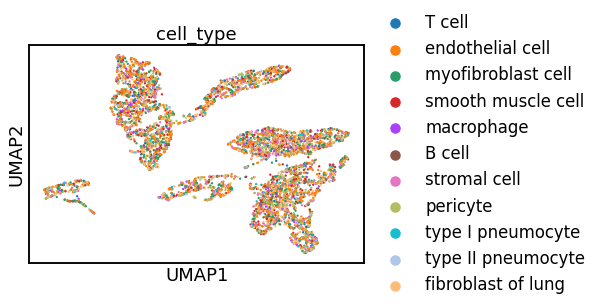

In [23]:
adata.obsm['scbert_cell_emb'] = emb
sc.pp.neighbors(adata, use_rep='scbert_cell_emb')
sc.tl.umap(adata)
sc.pl.umap(adata, color='cell_type')

# 2.scgpt

In [1]:
from biollm.utils.utils import load_config
from biollm.base.load_scgpt import LoadScgpt
import os
import scanpy as sc


config_file = './configs/scgpt_cell_emb.toml'
configs = load_config(config_file)

obj = LoadScgpt(configs)
print(obj.args)

adata = sc.read_h5ad(configs.input_file)
adata.var["gene_name"] = adata.var["feature_name"]
adata.var_names = adata.var["feature_name"].tolist()
adata.obs["celltype_id"] = adata.obs["cell_type"].cat.codes
adata.obs["batch_id"] = 0
file_name = os.path.basename(configs.input_file)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(obj.args.emb_type, adata=adata)
print('embedding shape:', emb.shape)
if not os.path.exists(configs.output_dir):
    os.makedirs(configs.output_dir, exist_ok=True)
adata.obsm['scgpt_cell_emb'] = emb 
adata.write_h5ad(obj.args.output_dir + f'/scgpt_{file_name}_emb.h5ad')

{'ntoken': 60697, 'd_model': 512, 'nhead': 8, 'd_hid': 512, 'nlayers': 12, 'nlayers_cls': 3, 'n_cls': 1, 'dropout': 0.2, 'pad_token': '<pad>', 'do_mvc': False, 'do_dab': False, 'use_batch_labels': False, 'num_batch_labels': None, 'domain_spec_batchnorm': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'mvc_decoder_style': 'inner product', 'ecs_threshold': 0.3, 'explicit_zero_prob': False, 'fast_transformer_backend': 'flash', 'pre_norm': False, 'vocab': GeneVocab(), 'pad_value': -2, 'n_input_bins': 51, 'use_fast_transformer': True}


2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-07-01 16:55:06-load_llm[line-46]-INFO: Loading params value_encoder

Munch({'model_used': 'scgpt', 'emb_type': 'cell', 'model_file': '../../case/models/scgpt/best_model.pt', 'model_param_file': '../../case/models/scgpt/args.json', 'vocab_file': '../../case/models/scgpt/vocab.json', 'input_file': '/home/share/huadjyin/home/s_huluni/project/bio_model/biollm/tutorials/zero-shot/cabe6d98-2da8-4cd4-a8dc-66726eeb104a.h5ad', 'output_dir': '../../case/result/zero-shot/', 'pad_value': -2, 'mask_ratio': 0, 'device': 'cuda:0', 'CLS': False, 'ADV': False, 'CCE': False, 'MVC': False, 'ECS': False, 'do_preprocess': True, 'data_is_raw': False, 'append_cls': True, 'distributed': False, 'include_zero_gene': False, 'input_style': 'binned', 'output_style': 'binned', 'nlayers_cls': 3, 'do_mvc': False, 'do_dab': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'do_sample_in_train': False, 'per_seq_batch_sample': False, 'batch_size': 8, 'data_source': '/scratch/ssd004/datasets/cellxgene/scb_strict/human', 'save_dir': '/scratch/ssd004/datasets/cellxgene/save/c

2024-07-01 16:55:09-load_scgpt[line-180]-INFO: start to get cell embedding!
2024-07-01 16:55:09-load_scgpt[line-159]-INFO: match 22762/29754 genes in vocabulary of size 60697.


scGPT - INFO - Binning data ...


/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/biollm/repo/scgpt/preprocess.py:208: ImplicitModificationWarning: Setting element `.layers['X_binned']` of view, initializing view as actual.
  adata.layers[self.result_binned_key] = np.stack(binned_rows)
2024-07-01 16:55:16-load_scgpt[line-183]-INFO: get dataloader Done!
Cell embedding: 100%|██████████| 688/688 [00:14<00:00, 46.81it/s]
2024-07-01 16:55:31-load_scgpt[line-209]-INFO: get cell embedding Done!


embedding shape: (5499, 512)


In [2]:

adata.obsm['scgpt_cell_emb'] = emb

In [3]:
sc.pp.neighbors(adata, use_rep='scgpt_cell_emb')
sc.tl.umap(adata)

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


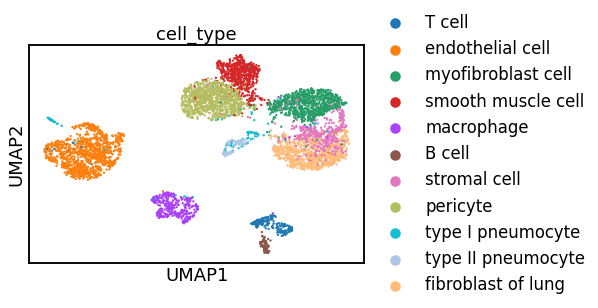

In [4]:
sc.pl.umap(adata, color='cell_type')

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


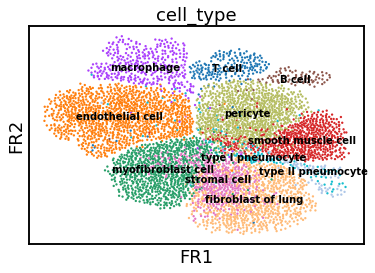

In [6]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color="cell_type", legend_loc="on data")

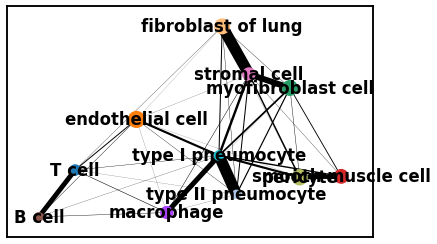

In [7]:
sc.tl.paga(adata, groups="cell_type")
sc.pl.paga(adata, color=["cell_type"])

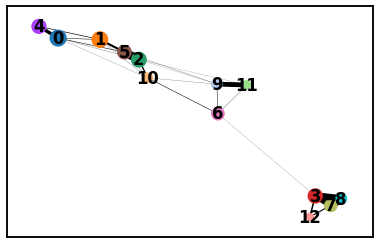

In [8]:
sc.tl.louvain(adata, resolution=1.0)
sc.tl.paga(adata, groups="louvain")
sc.pl.paga(adata, color=["louvain"])

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


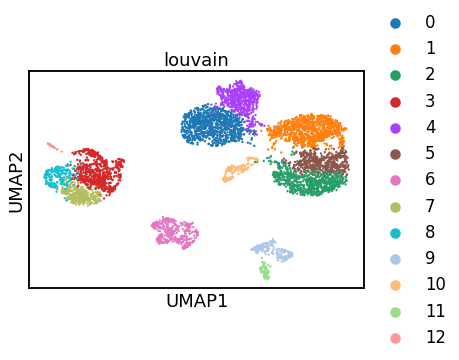

In [9]:
sc.pl.umap(adata, color='louvain')

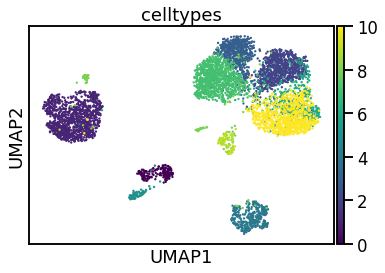

In [15]:
sc.pl.umap(adata, color='celltypes')

## 3. geneformer

In [3]:
from biollm.utils.utils import load_config
from biollm.base.load_geneformer import LoadGeneformer
import scanpy as sc
import os


config_file = './configs/geneformer_cell_emb.toml'
configs = load_config(config_file)

obj = LoadGeneformer(configs)
print(obj.args)

adata = sc.read_h5ad(configs.input_file)[0:1000, :]
file_name = os.path.basename(configs.input_file)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(obj.args.emb_type, adata=adata)
print('embedding shape:', emb.shape)
if not os.path.exists(configs.output_dir):
    os.makedirs(configs.output_dir, exist_ok=True)
adata.obsm['geneformer_cell_emb'] = emb 
adata.write_h5ad(obj.args.output_dir + f'/geneformer_{file_name}_emb.h5ad')

Munch({'model_used': 'geneformer', 'model_type': 'Pretrained', 'model_file': '/home/share/huadjyin/home/s_huluni/project/bio_model/models/geneformer', 'vocab_file': '/home/share/huadjyin/home/s_huluni/project/bio_model/models/geneformer/gene_vocab.json', 'n_bins': 100, 'input_file': '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/data/finetune/cell_annotation/scgpt/ms_test.h5ad', 'output_dir': '../../case/result/zero-shot/', 'device': 'cuda:0', 'emb_type': 'cell', 'encoder_dims': 768, 'encoder_heads': 12, 'encoder_depth': 12})
AnnData has no column attribute 'filter_pass'; tokenizing all cells.


/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/biollm/repo/geneformer/tokenizer.py:216: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = np.ravel(adata.X.sum(axis=1))


Creating dataset.


Map (num_proc=16):   0%|          | 0/1000 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/1000 [00:00<?, ? examples/s]

  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([100, 577, 256])
torch.Size([100, 376, 256])
torch.Size([100, 449, 256])
torch.Size([100, 416, 256])
torch.Size([100, 468, 256])
torch.Size([100, 710, 256])
torch.Size([100, 872, 256])
torch.Size([100, 969, 256])
torch.Size([100, 1194, 256])
torch.Size([100, 908, 256])
embedding shape: (1000, 256)


## 4. scfoundation

In [1]:
from biollm.utils.utils import load_config
from biollm.base.load_scfoundation import LoadScfoundation
import scanpy as sc
import os


config_file = './configs/scfoundation_cell_emb.toml'
configs = load_config(config_file)

obj = LoadScfoundation(configs)
print(obj.args)

adata = sc.read_h5ad(configs.input_file)[0:1000, :]
file_name = os.path.basename(configs.input_file)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(obj.args.emb_type, adata=adata)
print('embedding shape:', emb.shape)
if not os.path.exists(configs.output_dir):
    os.makedirs(configs.output_dir, exist_ok=True)
adata.obsm['scfoundation_cell_emb'] = emb 
adata.write_h5ad(obj.args.output_dir + f'/scfoundation_{file_name}_emb.h5ad')

{'mask_gene_name': False, 'gene_num': 19266, 'seq_len': 19266, 'encoder': {'hidden_dim': 768, 'depth': 12, 'heads': 12, 'dim_head': 64, 'seq_len': 19266, 'module_type': 'transformer', 'norm_first': False}, 'decoder': {'hidden_dim': 512, 'depth': 6, 'heads': 8, 'dim_head': 64, 'module_type': 'performer', 'seq_len': 19266, 'norm_first': False}, 'n_class': 104, 'pad_token_id': 103, 'mask_token_id': 102, 'bin_num': 100, 'bin_alpha': 1.0, 'rawcount': True, 'model': 'mae_autobin', 'test_valid_train_idx_dict': '/nfs_beijing/minsheng/data/os10000w-new/global_shuffle/meta.csv.train_set_idx_dict.pt', 'valid_data_path': '/nfs_beijing/minsheng/data/valid_count_10w.npz', 'num_tokens': 13, 'train_data_path': None, 'isPanA': False, 'isPlanA1': False, 'max_files_to_load': 5, 'bin_type': 'auto_bin', 'value_mask_prob': 0.3, 'zero_mask_prob': 0.03, 'replace_prob': 0.8, 'random_token_prob': 0.1, 'mask_ignore_token_ids': [0], 'decoder_add_zero': True, 'mae_encoder_max_seq_len': 15000, 'isPlanA': False, 'ma

2024-06-06 11:05:32-load_scfoundation[line-89]-INFO: covert gene feature into 19264


Munch({'model_used': 'scfoundation', 'model_file': '../../case/models/scfoundation/models.ckpt', 'vocab_file': '../../case/models/scfoundation/gene_vocab.json', 'key': 'cell', 'emb_type': 'cell', 'input_type': 'singlecell', 'tgthighres': 't4', 'pool_type': 'all', 'batch_size': 16, 'n_bins': 100, 'input_file': '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/data/finetune/cell_annotation/scgpt/ms_test.h5ad', 'output_dir': '../../case/result/zero-shot/', 'device': 'cuda:0', 'quantile_cutoff': 0, 'encoder_dims': 128, 'encoder_heads': 12, 'encoder_depth': 12, 'data_is_raw': False, 'max_seq_len': 19264, 'use_g2v': False})


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
100%|██████████| 63/63 [00:11<00:00,  5.41it/s]
2024-06-06 11:05:49-load_scfoundation[line-165]-INFO: end to get cell embedding!
/tmp/ipykernel_3306361/3347382890.py:20: ImplicitModificationWarning: Setting element `.obsm['scfoundation_cell_emb']` of view, initializing view as actual.
  adata.obsm['scfoundation_cell_emb'] = emb


embedding shape: (1000, 768)


In [2]:
from biollm.base.load_mamba import LoadScmamba
from biollm.utils.utils import load_config
import numpy as np
import torch
import scanpy as sc
import os

config_file = './configs/scmamba_cell_emb.toml'
configs = load_config(config_file)


adata = sc.read_h5ad(configs.input_file)
sc.pp.highly_variable_genes(adata, subset=True)
adata.var_names = adata.var["feature_name"].tolist()
obj = LoadScmamba(configs)
adata = obj.preprocess_adata(adata)
configs.max_seq_len = adata.shape[1]
file_name = os.path.basename(configs.input_file)

if 'gene_name' not in adata.var:
    adata.var['gene_name'] = adata.var.index.values
    
gene_ids = [obj.get_gene2idx().get(key) for key in adata.var_names]
gene_ids = np.array(gene_ids)
gene_ids = torch.tensor(gene_ids, dtype=torch.long).to(configs.device)

obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(obj.args.emb_type, adata, gene_ids)
print('embedding shape:', emb.shape)


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.resul

Using simple batchnorm instead of domain specific batchnorm


2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-06-24 11:04:29-load_llm[line-46]-INFO: Loading params value_encoder

embedding shape: (5499, 512)


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[2.52590769e-14 1.84775733e-05 6.27234401e-06 1.20145957e-05]
not reaching the requested tolerance 1.1622905731201172e-06.
Use iteration 1788 instead with accuracy 
1.6285773524669165e-06.

  _, diffusion_map = lobpcg(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.81232125e-15 2.89234724e-06 1.49854049e-06 2.12336737e-06]
not reaching the requested tolerance 1.1622905731201172e-06.
  _, diffusion_map = lobpcg(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding 

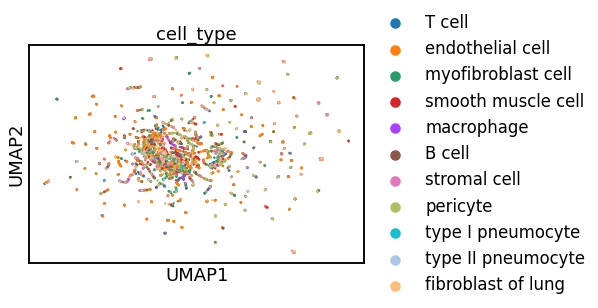

In [3]:
adata.obsm['scmamba_cell_emb'] = emb
sc.pp.neighbors(adata, use_rep='scmamba_cell_emb')
sc.tl.umap(adata)
sc.pl.umap(adata, color='cell_type')

In [4]:
adata.X.max()

10.952532